In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras import backend as k
import time
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, Add, Flatten, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


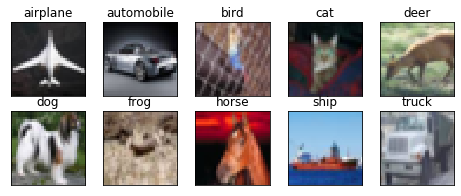

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
model = Sequential()

model.add(Convolution2D(64, (3, 3), border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))



model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 2))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)      

In [0]:
model.fit(train_features, train_labels, batch_size=128, epochs=20, verbose=1,
         validation_data=(test_features, test_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 20s 405us/step - loss: 1.4931 - acc: 0.4619 - val_loss: 1.3359 - val_acc: 0.5555
Epoch 2/20
50000/50000 [==============================] - 14s 286us/step - loss: 0.9679 - acc: 0.6554 - val_loss: 0.9597 - val_acc: 0.6669
Epoch 3/20
50000/50000 [==============================] - 14s 287us/step - loss: 0.7700 - acc: 0.7284 - val_loss: 0.8025 - val_acc: 0.7219
Epoch 4/20
50000/50000 [==============================] - 14s 286us/step - loss: 0.6578 - acc: 0.7706 - val_loss: 0.9367 - val_acc: 0.7071
Epoch 5/20
50000/50000 [==============================] - 14s 286us/step - loss: 0.5841 - acc: 0.7964 - val_loss: 0.6774 - val_acc: 0.7615
Epoch 6/20
50000/50000 [==============================] - 14s 284us/step - loss: 0.5278 - acc: 0.8177 - val_loss: 0.7382 - val_acc: 0.7607
Epoch 7/20
50000/500

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [0]:
raw_image1 = train_features[1]
raw_image2 = train_features[2]
raw_image3 = train_features[3]
raw_image4 = train_features[4]
raw_image5 = train_features[5]

0.91764706 0.015686275 0.31460503
0.003598616 6.151481e-05 0.0012337452


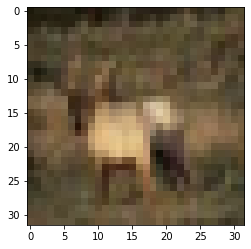

In [0]:
plt.imshow(raw_image3)
img = image.img_to_array(raw_image3)
img = np.expand_dims(img,axis=0)
print(img.max(), img.min(), img.mean())
img = img.astype('float32')/255
#plt.imshow(img)
print(img.max(), img.min(), img.mean())


In [0]:
preds = model.predict(img)
print(preds)

class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
# conv2d_53
last_conv_layer = model.get_layer("conv2d_14")

#conv2d_51


[[0.01646602 0.00127003 0.01202509 0.10947464 0.51090014 0.0296274
  0.2997265  0.00142495 0.01648214 0.00260319]]
4


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img])
for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]




In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


In [0]:
heatmap.shape

(2, 2)

Image SuperImoposing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32)


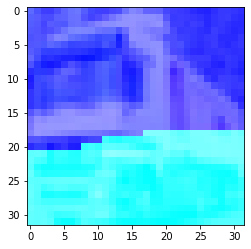

In [0]:
heatmap = cv2.resize(heatmap, (raw_image1.shape[1], raw_image1.shape[0]))
print(heatmap.shape)
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(raw_image1, 0.6, heatmap, 0.4,0, dtype = cv2.CV_32F)
plt.imshow(superimposed_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


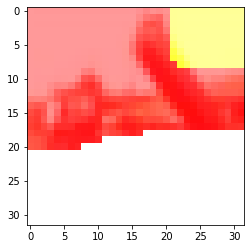

In [0]:
heatmap = cv2.resize(heatmap, (raw_image2.shape[1], raw_image2.shape[0]))
print(heatmap.shape)
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(raw_image2, 0.6, heatmap, 0.4,0, dtype = cv2.CV_32F)
plt.imshow(superimposed_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


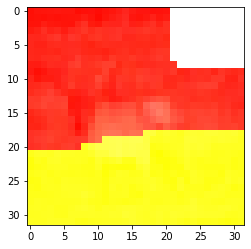

In [0]:
heatmap = cv2.resize(heatmap, (raw_image3.shape[1], raw_image3.shape[0]))
print(heatmap.shape)
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(raw_image3, 0.6, heatmap, 0.4,0, dtype = cv2.CV_32F)
plt.imshow(superimposed_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


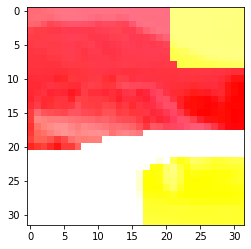

In [0]:
heatmap = cv2.resize(heatmap, (raw_image4.shape[1], raw_image4.shape[0]))
print(heatmap.shape)
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(raw_image4, 0.6, heatmap, 0.4,0, dtype = cv2.CV_32F)
plt.imshow(superimposed_img)

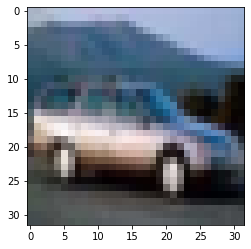

In [0]:
plt.imshow(raw_image4)